In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import json
from sklearn.datasets import make_classification
from sklearn.tree import plot_tree

In [2]:
# Load user input data
with open('user.json', 'r') as f:
    user_data = json.load(f)

# Create label encoders
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
le5 = LabelEncoder()
le6 = LabelEncoder()
le7 = LabelEncoder()
le8 = LabelEncoder()


In [3]:
# Create dataframes
for i in user_data:
    data = user_data[str(i)]["data"]
    result = user_data[str(i)]["result"]
    dataframe = pd.DataFrame(data, columns=["Name","Type 1", "Type 2", "Generation","legendary", "color","first_letter"])
    resultframe = pd.DataFrame(result, columns=["favorite"])

    # Generate numerical labels
    dataframe["Name"] = le1.fit_transform(dataframe["Name"])
    dataframe["Type 1"] = le2.fit_transform(dataframe["Type 1"])
    dataframe["Type 2"] = le3.fit_transform(dataframe["Type 2"])
    dataframe["Generation"] = le4.fit_transform(dataframe["Generation"])
    dataframe["legendary"] = le5.fit_transform(dataframe["legendary"])
    dataframe["color"] = le6.fit_transform(dataframe["color"])
    dataframe["first_letter"] = le7.fit_transform(dataframe["first_letter"])
    resultframe["favorite"] = le8.fit_transform(resultframe["favorite"])

    # Split data into training and testing sets
    train_data = dataframe.sample(frac=0.8, random_state=0)
    test_data = dataframe.drop(train_data.index)

    # Split labels into training and testing sets
    train_labels = resultframe.sample(frac=0.8, random_state=0)
    test_labels = resultframe.drop(train_labels.index)

    # Define the model
    model = RandomForestClassifier(n_estimators=100, random_state=0)

    # Train the model
    model.fit(train_data, train_labels)
    break

C:\Users\Tototime\AppData\Local\Temp\ipykernel_63724\2004454129.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_data, train_labels)


[Text(0.5, 0.9375, 'x[0] <= 33.5\ngini = 0.5\nsamples = 24\nvalue = [18, 17]'),
 Text(0.15384615384615385, 0.8125, 'x[0] <= 1.5\ngini = 0.444\nsamples = 17\nvalue = [16, 8]'),
 Text(0.07692307692307693, 0.6875, 'gini = 0.0\nsamples = 2\nvalue = [0, 3]'),
 Text(0.23076923076923078, 0.6875, 'x[6] <= 7.5\ngini = 0.363\nsamples = 15\nvalue = [16, 5]'),
 Text(0.15384615384615385, 0.5625, 'gini = 0.0\nsamples = 4\nvalue = [6, 0]'),
 Text(0.3076923076923077, 0.5625, 'x[6] <= 13.5\ngini = 0.444\nsamples = 11\nvalue = [10, 5]'),
 Text(0.15384615384615385, 0.4375, 'x[0] <= 16.5\ngini = 0.5\nsamples = 6\nvalue = [4, 4]'),
 Text(0.07692307692307693, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [3, 0]'),
 Text(0.23076923076923078, 0.3125, 'x[0] <= 22.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.15384615384615385, 0.1875, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.3076923076923077, 0.1875, 'x[0] <= 24.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.23076923076923078, 0.0625, 'g

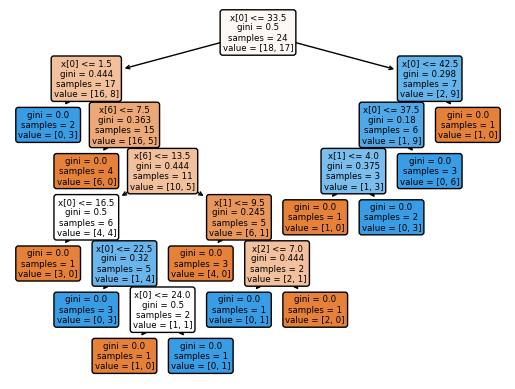

In [4]:
# Visualize the Forest
plot_tree(model.estimators_[0], filled=True, rounded=True)